# A Rigorous Proof of Proximal Gradient Method's Convergence Rate
> "Prooving the convergence rate of PGMs is $O(\frac{1}{k})$"
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/PGD.png
- hide: false
- search_exclude: false

#### Proximal Gradient Descent

A proximal algorithm is an algorithm for solving a convex optimization problem that uses the proximal operators of the objective terms. It is called such since it consists of a gradient step followed by a proximal mapping.  There are three main benefits to the application of proximal algorithms:
- 1. They work under extremely general conditions, including cases where the functions are nonsmooth and extended real-valued
- 2. They can be fast, since there can be simple proximal operators for functions that are otherwise challenging to handle in an optimization problem
- 3. They are amenable to distributed optimization, so they can be used to solve very large scale problems

The proximal operator is defined as $$ prox_f(x) = argmin\left \{ f(u) + \frac{1}{2}\left \| u-x \right \|^2: u \in \mathbb{R}^n \right \}, \forall x \in \mathbb{R}^n $$
with the goal being to $$minimize\left \{ f(u) + h(u): u \in \mathbb{R}^n \right \}$$
where h is a proper lower semi-continuous function and f is a smooth convex function on dom(h). 
<br>

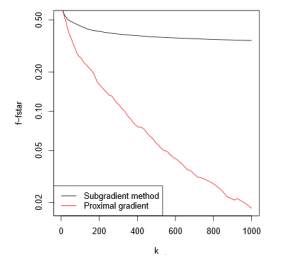

Example of proximal gradient descent (ISTA) vs. subgradient method convergence rates
<br>

__Some important assumptions before we begin:__

We assume that f has L-Lipschitz continuous gradient, i.e., $$\left \| \bigtriangledown f(x) - \bigtriangledown f(y) \right \| \leq L\left \| x-y \right \|, \forall x, y \in dom(h)$$
and hence for every $x, y \in dom(h)$, $$ f(x) \leq l_f(x; y) + \frac{L}{2}\left \| x-y \right \|^2$$
where $l_f(x; y) := f(y) + \left \langle \bigtriangledown f(y), x-y \right \rangle$.

Recal that PGM with a constant prox stepsize is recursive in nature and iterates according to : $$x_{k+1}=prox_{\lambda h}(x_k-\lambda\nabla f(x_k)).$$

#### Let's get started!

First, we will derive a single iteration of PGM and prove that it is strong convex.

$$ x_{k+1} = argmin\left \{ h(u) +\frac{1}{2}\left \| u-(x_k-\bigtriangledown f(x_k)) \right \|^2 \right \}$$

$$ x_{k+1} = argmin\left \{ f(x_k) + \left \langle \bigtriangledown f(x_k), u-x_k \right \rangle +h(u) + \frac{1}{2}\left \| x-x_k \right \|^2 \right \}$$

$$x_{k+1}= argmin \left\{\ell_f(u;x_k)+h(u) + \frac{1}{2\lambda}||u-x_k||^2 \right\}, $$

And proving strong convexity $\left \langle \bigtriangledown h(u) - \bigtriangledown h(x), u - x \right \rangle \geq \lambda \left \| u-x \right \|^{2}$:

$$ \left \langle prox_{\lambda h}(u) - prox_{\lambda h}(x), (u-\frac{1}{\lambda}\bigtriangledown h(u)) -(x-\frac{1}{\lambda}\bigtriangledown h(x))  \right \rangle \geq \left \| prox_{\lambda h}(u)-prox_{\lambda h}(x) \right \|^{2} $$

$$ \left \langle (u - \frac{1}{\lambda}\bigtriangledown h(u)) - (x - \frac{1}{\lambda}\bigtriangledown h(x)), (u-\frac{1}{\lambda}\bigtriangledown h(u)) -(x-\frac{1}{\lambda}\bigtriangledown h(x))  \right \rangle \geq  \left \| (u - \frac{1}{\lambda}\bigtriangledown h(u)) - (x - \frac{1}{\lambda}\bigtriangledown h(x)) \right \|^{2} $$

Using the definition of $x_{k+1}$ and the strong convexity, we obtain upon rearranging terms that:

$$ h(x_{k+1}) \leq h(x) + \left \langle -\bigtriangledown f(u), x^{k+1}-x \right \rangle + \frac{1}{2}\left \| u-x \right \|^2 - \frac{1}{2}\left \| u-x^{k+1} \right \|^2 - \frac{1}{2}\left \| x^{k+1}-x \right \|^2 $$

Due to the Lipschitz continuity:
$$ f(x_{k+1}) \leq f(u) + \left \langle -\bigtriangledown f(u), u-x^{k+1} \right \rangle + \frac{1}{2}\left \| u-x_{k+1} \right \|^2 $$

Adding the two: $$ f(x_{k+1}) + h(x_{k+1}) \leq f(u) + h(x) + \left \langle \bigtriangledown f(u), u-x \right \rangle - \frac{1}{2}\left \| x_{k+1}-x \right \|^2 + \frac{1}{2}\left \| u-x \right \|^2 $$

Using definition for $\ell_f(u;x_k)$ $$\ell_f(u;x_k)+h(u) + \frac{1}{2}||u-x_k||^2 \geq \ell_f(x_{k+1};x_k)+h(x_{k+1})+\frac{1}{2}||x_{k+1}-x_k||^2 + \frac{1}{2}||u-x_{k+1}||^2$$

Similarly for any x in int(dom(f)):
$$ f(x_*) \leq f(x) + \left \langle \bigtriangledown f(x), x_*-x \right \rangle + \frac{1}{2\lambda}\left \| x_*-x \right \|^2 $$
It holds that $$ (f+h)(x)-(f+h)(x_*) \geq \frac{1}{2\lambda}\left \| x-x_* \right \|^2 $$

Consider $$ g(u) = f(x_{k+1})+\left \langle \bigtriangledown f(x_{k+1}), u-x_{k+1} \right \rangle + g(u)+\frac{1}{2\lambda}\left \| u-x_{k+1} \right \|^2$$

$ x_* = argmin_g(u) $
$$ g(x)-g(x_*) \geq \frac{1}{2\lambda}\left \| x-x_* \right \|^2 $$

Since $$ g(x_*) = f(x_{k+1}) + \left \langle \bigtriangledown f(x_{k+1}),x_*-x_{k+1} \right \rangle + \frac{1}{2\lambda}\left \| x_*-x_{k+1} \right \|^2 + h(x_*) $$
$$ \geq f(x_*)+h(x_*) = (f+h)(x_*) $$

This implies that $$ h(x_{k+1})-(f+h)(x_*) \geq \frac{1}{2\lambda}\left \|  x_{k+1}-x_*\right \|^2 $$

Plugging for g(u) into above inequality

$$ f(x_{k+1}) + \left \langle \bigtriangledown f(x_{k+1}), x-x_{k+1} \right \rangle + h(x)+\frac{1}{2\lambda}\left \| x-x_{k+1} \right \|^2 -(f+h)(x_*) \geq \frac{1}{2\lambda}\left \| x-x_* \right \|^2$$

Which is equal to 

$$ (f+h)(x_{k+1})-(f+h)(x_*) \geq \frac{1}{2\lambda}\left \| x_{k+1}-x_* \right \|^2 -\frac{1}{2\lambda}\left \| x-x_{k+1} \right \|^2 +f(x_{k+1}) + \ell_f(x;x_{k+1}) $$

$$(f+h)(x_*)+\frac{1}{2\lambda}||x_k-x_*||^2 \geq (f+h)(x_{k+1})+h(x_{k+1})+ \frac{1}{2\lambda}||x_{k+1}-x_*||^2$$

Using $$ \frac{1}{2\lambda}((f+h)(x_*)-(f+h)(x_{k+1})) \geq \left \| x_*-x_{k+1} \right \|^2 -\left \| x_*-x_k \right \|^2 + \frac{1}{2\lambda}\ell_f(x_*,x_k)$$

$$ \frac{1}{2\lambda}((f+h)(x_*)-(f+h)(x_{k+1})) \geq \left \| x_*-x_{k+1} \right \|^2 -\left \| x_*-x_k \right \|^2 $$

Sum over all n from 0 to k to obtain:
$$
\frac{1}{2\lambda}\sum_{}^{k}(f+h)(x_*)-(f+h)(x_{k+1}) \geq \left \| x_*-x_k \right \|^2-\left \| x_*-x_0 \right \|^2
$$

Thus
$$
\sum_{}^{k}((f+h)(x_{k+1})-(f+h)(x_*)) \leq \frac{1}{2\lambda}\left \| x_*-x_0 \right \|^2-\frac{1}{2\lambda}\left \| x_*-x_k \right \|^2 \leq \frac{1}{2\lambda}\left \| x_*-x_0 \right \|^2
$$

Given the monotonicity of $(f+h)(x_n)$ for $n \geq 0$
$$ 
k((f+h)(x_k)-(f+h)(x_*)) \leq \sum_{}^{k}((f+h)(x_{k+1})-(f+h)(x_*)) \leq \frac{1}{2\lambda}\left \| x_*-x_0 \right \|^2
$$

Thus $$\sum_{i=1}^k (f+h)(x_i)-k(f+h)(x_*) \leq \frac{||x_0-x_*||^2}{2\lambda} $$


Proving PGM has the descent property:

$$(f+h)(x_k) \geq (f+h)(x_{k+1}), \forall k \geq 0 $$

$$ \frac{1}{2\lambda}((f+h)(x_*)-(f+h)(x_{k+1})) \geq \left \| x_*-x_{k+1} \right \|^2 -\left \| x_*-x_k \right \|^2 + \frac{1}{2\lambda}\ell_f(x_*,x_k)$$

Along with the relationship: $$ \left \| x_{k+1} -x_*\right \| \leq \left \| x_k-x_* \right \|$$

It follows that: $$ (f+h)(x_*)-(f+h)(x_{k+1}) \leq (f+h)(x_*)-(f+h)(x_{k}) \leq 0$$

Thus for all k $\geq 0$ $$(f+h)(x_{k+1}) \leq (f+h)(x_{k}) $$

Finally, given the above:
$$ 
k((f+h)(x_k)-(f+h)(x_*)) \leq \sum_{}^{k}((f+h)(x_{k+1})-(f+h)(x_*)) \leq \frac{1}{2\lambda}\left \| x_0-x_* \right \|^2
$$
Consequently
$$ (f+h)(x_i)-(f+h)(x_*) \leq  \frac{1}{k2\lambda}||x_0-x_*||^2 $$

Hence we obtain the $O(\frac{1}{k})$ convergence rate